In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Megan Poremba.")

My name is Megan Poremba.


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [2]:
# Your code here
################################################################
# Analytically:
one_day_rain = (0.8**29) * 0.2 * 100 * 30 # probability it won't rain the other 29 days multiplied by the probility it
                                       # rain on one day, multiplied by 100

print "Analytically, the probability that it will rain only one day of the month is %f percent." % (one_day_rain)

################################################################
# Numerically:

import numpy as np
ndays = 30
# How many days does it rain in one month?

def onerainday(month):
    days = 0
    one_rain = False
    
    for i in month:
        if i == 1:
            days += 1
            
    if days == 1: # needs to be outside of the for loop
        one_rain = True
                
    return one_rain

################################################################
# How many months does it rain only one day?

nmonths = 100000

nmonths_one_day_of_rain = 0

for i in range(0,nmonths):
    days_in_a_month = np.random.randint(1,6,ndays)
    
    if onerainday(days_in_a_month)==True:
        nmonths_one_day_of_rain += 1
        

print "Numerically, the number of months it rained only one day is %d." % (nmonths_one_day_of_rain)
print "The percent is %2.3f." % (100.0*nmonths_one_day_of_rain/float(nmonths))

Analytically, the probability that it will rain only one day of the month is 0.928455 percent.
Numerically, the number of months it rained only one day is 993.
The percent is 0.993.


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [23]:
# Your code here
 
################################################################
# Make a function that tracks when it rains and 
# identifies if it rains eight times in one month
ndays = 30
def eightraindays(month):
    
    eight_rains = False

    days = 0
    for i in month:
        if i==1:
            days += 1
            
    if days >= 8: # needs to be outside of the loop
        eight_rains = True
            
    return eight_rains

################################################################
# How many months does it rain eight days exactly?

nmonths = 100000

nmonths_eight_rains = 0

for i in range(0,nmonths):
    days = np.random.randint(1,11,ndays)
    
    if eightraindays(days)==True:
        nmonths_eight_rains +=1

print "The number of months it rained at least eight days is %d." % (nmonths_eight_rains)
print "The percent is at least %2.3f." % (100.0*nmonths_eight_rains/float(nmonths))


The number of months it rained at least eight days is 730.
The percent is at least 0.730.


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [40]:
# Your code here

################################################################
# 1. does it rain?

def doesitrain(month): # the input will be a list of thirty numbers between zero and one
    total = 0
    day = len(month)
    
    for i in range(0,day):

        if month[i-3] <= 0.1 and month[i-2] <=0.2 and month[i-1] <= 0.25:
            if month[i] <= 0.05: # month[i] accesses the actual number
                total += 1
        
        if month[i-2] <=0.1  and month[i-1] <=0.2 and month[i-3] >0.1:
            if month[i] <= 0.25:
                total += 1
        
        if month[i-1] <= 0.1 and month[i-2] > 0.1:
            if month[i] <= 0.2: 
                total += 1  
        
        elif month[i] <= 0.1:
            total += 1        
            
    return total

################################################################
# 2. how much rain?

def howmuchrain(daysrained): # the input to this function will be the output of doesitrain
    
    x = np.random.random(daysrained)   # generate numbers between zero and one. The number of numbers depends
                                       # on how many days it rained in the month
    rainfall = 0                       # use this to track the cm of rain

    for i in x:                        # loop over the list of numbers for the days of rain
        if i <= 0.2:                   # use a bunch of conditionals for amount of rain
            rainfall += 1
        elif i > 0.2 and i <= 0.5:
            rainfall += 2
        elif i >0.5 and i <= 0.8:
            rainfall += 3
        elif i > 0.8 and i <= 0.9:
            rainfall += 4
        elif i > 0.9 and i <= 1.0:
            rainfall += 5

    return rainfall

################################################################
# 3. track the rain for the month

nmonths = 100000                # this is the nuber of months
nmonths_10cm = 0                # set a variable to track the months it rained at least 10 cm

for i in range(0,nmonths):      # loop of the entire list of months
    days = np.random.random(30) # generate 30 numbers between zero and one for every month in the range
    
    daysrained = doesitrain(days) # set a variable equal to the number of days it rained in a month
                                  # (which is the first function with the input of thrity random numbers between 0-1)
    if howmuchrain(daysrained) >= 10: # if the total rainfall is greater than/equal to 10 cm
        nmonths_10cm +=1              # add one to the variable tracking the months it rained 10+ cm
        
print "The odds there is at least 10 cm of rain in any given month is %.3f percent." % (100.*nmonths_10cm/float(nmonths))

The odds there is at least 10 cm of rain in any given month is 40.200 percent.


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

In [41]:
# Your code here

# In this cell, I am creating an array from the Monte Carlo method.
# I do this by appending the different amounts of rainfall from each month to an empty list.

nmonths = 100000    
rain = []
for i in range(0,nmonths):
    days = np.random.random(30)
    daysrained = doesitrain(days)
    rainfall = howmuchrain(daysrained)
    rain.append(rainfall)

<IPython.core.display.Javascript object>


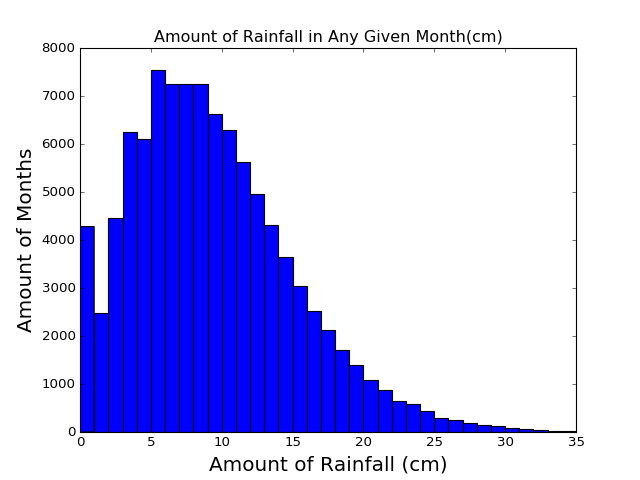

In [44]:
import matplotlib.pylab as plt

%matplotlib notebook

plt.figure() # Make a figure (empty plot)
plt.hist(rain, bins=50, range = (0,50))

# Add labels with a bigger font than the default.
plt.xlabel('Amount of Rainfall (cm)',fontsize=18)
plt.ylabel('Amount of Months',fontsize=18)
label = "Plot"

# Change the plotting range for the xlimits (xlim) and ylimits (ylim).
plt.xlim(0,35)

# Add a title
plt.title("Amount of Rainfall in Any Given Month(cm)")

# Add a legend.
plt.legend()

# Save it
plt.savefig("Rain_Histogram.png")

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [45]:
# Your code here?

print "The average amount of rainfall in any given month is %.1f cm." % (np.mean(rain))

The average amount of rainfall in any given month is 8.9 cm.


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [46]:
# Your code here
list = np.sort(rain)

In [48]:
# 2.5% of 100000 test numbers
x = .025 * nmonths
#print x

# The lower edge for 100,000  months is the 2,500th number.
# The higher edge for 100,000 months is the 97,500th number.

low = list[2500]
high = list[97500]

print "I'm 95 percent confident the rainfall will be between %.0f and %.0f cm." % (low, high)

I'm 95 percent confident the rainfall will be between 0 and 22 cm.
